<a href="https://colab.research.google.com/github/MohammadKatif/Voxelization/blob/main/Voxelization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 7.4 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import trimesh

In [4]:
# Plotting a 3D CAD model using trimesh

# Load the .off file
mesh = trimesh.load_mesh('airplane_0001.off') # This CAD Model is taken from the ModelNet40 dataset of the Princeton university

# Access mesh data if needed
vertices = mesh.vertices
faces = mesh.faces

# Changing the color of the mesh object
new_color = [1.0, 1.0, 1.0]
mesh.visual.face_colors = new_color
# Red=[1,0,0], Green=[0,1,0], Blue=[0,0,1], Yellow=[1,1,0], Cyan=[0,1,1], Purple=[1,0,1], Black=[0,0,0], Grey=[1,1,1]

mesh.show()

In [7]:
# Performing voxelization to convert the 3D object(mesh) to a voxel grid and then to a 3D voxel array

voxel_grid = mesh.voxelized(pitch=1.0) # If pitch value is low then the resolution will be high but it will take more computational resources(memory)

voxel_array = voxel_grid.matrix.astype(int) # Convert the voxel grid to a 3D voxel array

# Just like how a pixel is the smallest unit of a 2D image, voxel is the smallest unit of a 3D image

In [6]:
print(voxel_array.shape) # Shape = Depth, Row, Col

# The shape of the voxel array reduces if the pitch value is high, which ultimately reduces the resolution of the 3D object
# The shape of the voxel array increases if the pitch value is low, which ultimately increases the resolution of the 3D object

(359, 290, 118)


In [9]:
np.savez_compressed('voxel_array.npz', voxel_array) # This command can be used to save the voxel array in a compressed npz file using numpy

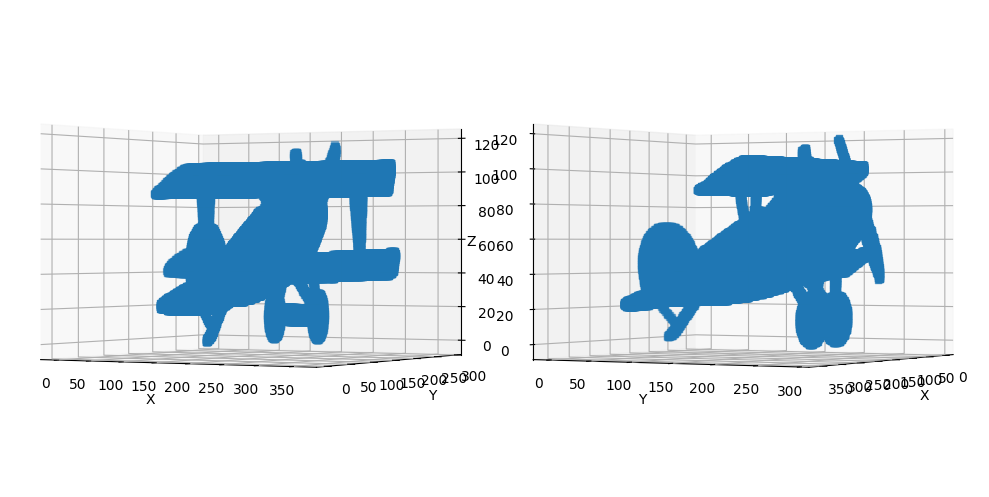

In [10]:
# Plotting the 3D voxel array in matplotlib to confirm whether the voxelization was successful or not

x, y, z = np.nonzero(voxel_array) # Extract non-zero voxel coordinates

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(1,2,1, projection='3d') # fig.add_subplot(row, col, panel, projection='3d')
ax1.scatter(x, y, z, marker='s') # Plot the non-zero voxels
# ax2.set_title('Back view')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
# Chaning the perspective of the plot: By default it is eval=30 and azim=-60
ax1.view_init(elev=0, azim=-60) # eval controls the verticle angle while azim controls the horizontal angle

ax2 = fig.add_subplot(1,2,2, projection='3d')  # row, col, panel
ax2.scatter(x, y, z, marker='s') # Plot the non-zero voxels
# ax2.set_title('Front view')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
# Chaning the perspective of the plot: By default it is eval=30 and azim=-60
ax2.view_init(elev=0, azim=30) # eval controls the verticle angle while azim controls the horizontal angle

# Show the plot
plt.tight_layout()
plt.show() # Hence the 3D object has been successfully converted to a 3D Array(voxel array)